In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import math 
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
import cv2

In [2]:
model = tf.keras.models.load_model('Model/digit_recoginition.h5')

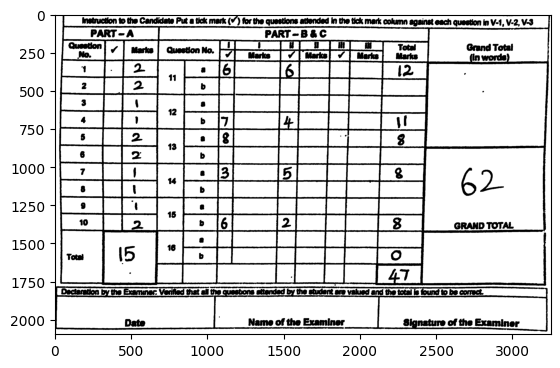

In [3]:
input_dir= r"images/sheet/input sheets/"  
cropped_dir_path = r"images/sheet/table/" 
for filename in os.listdir(input_dir):
    if filename.endswith("last1.jpg"):  
        img_for_box_extraction_path = os.path.join(input_dir, filename)
        img = cv2.imread(img_for_box_extraction_path, 0)
        
        if img is not None:
            (thresh, img_bin) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
            
            if img_bin is not None:
                img_bin = 255 - img_bin
                #cv2.imwrite(os.path.join(cropped_dir_path, "inverted_" + filename), img_bin)

                v_kernel_length = np.array(img).shape[1] // 1200
                h_kernel_length = np.array(img).shape[1] // 1200
                verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, v_kernel_length))
                hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (h_kernel_length, 1))
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

                img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=2)
                verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=2)
                #cv2.imwrite(os.path.join(cropped_dir_path, "verticle_lines_" + filename), verticle_lines_img)

                img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=2)
                horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=2)
                #cv2.imwrite(os.path.join(cropped_dir_path, "horizontal_lines_" + filename), horizontal_lines_img)

                alpha = 0.5
                beta = 1.0 - alpha

                img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
                img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
                (thresh, img_final_bin) = cv2.threshold(img_final_bin, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
                cv2.imwrite(os.path.join(cropped_dir_path, "image_final_" + filename), img_final_bin)
                
                plt.imshow(img_final_bin, cmap='gray')
                
                contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [4]:
idx = 0
contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[1])
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if(400<x<500 and 200<y<1400 and 200<w<230 and 90<h<110):
        print(w , h)
        idx += 1
        new_img = img[y:y+h, x:x+w]
        cv2.imwrite("images/sheet/digit/"+ str(idx) + '.jpg', new_img)

219 101
218 103
219 105
221 106
221 106
221 106
221 103
221 102
220 101
219 100


In [5]:
contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[1])
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if(2100<x<2200 and 300<y<1800 and 270<w<290 and 90<h<110):
        print(w , h)
        idx += 1
        new_img = img[y:y+h, x:x+w]
        cv2.imwrite("images/sheet/digit/"+ str(idx)+ '.jpg', new_img)

285 104
284 103
284 103
285 106
283 107
283 105
282 103
281 104
283 100
284 100
283 99
283 99


In [6]:
lis=[]
image_path='images/sheet/digit/'
for filename in os.listdir(image_path):
    lis.append(filename)

In [7]:
lis.sort(key=lambda f: int("".join(filter(str.isdigit, f))))
print(lis)

['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '20.jpg', '21.jpg', '22.jpg']


3920   70   56


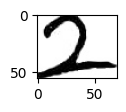

3355   61   55


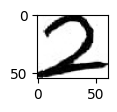

624   13   48


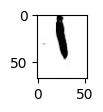

462   11   42


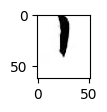

3380   65   52


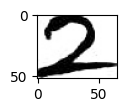

2688   56   48


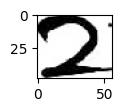

649   11   59


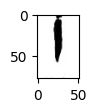

689   13   53


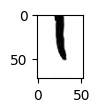

484   11   44


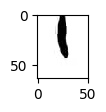

3960   72   55


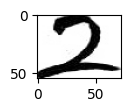

1035   15   69


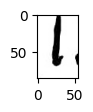

4473   63   71


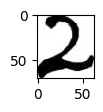

1292   19   68


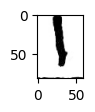

832   13   64


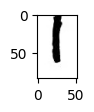

3010   43   70


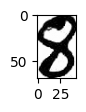

3082   46   67


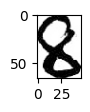

3600   50   72


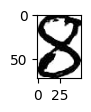

3906   63   62


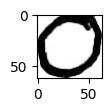

{1: [1],
 2: [2],
 3: [3],
 4: [4],
 5: [5],
 6: [6],
 7: [7],
 8: [8],
 9: [9],
 10: [10],
 11: [11, 12],
 12: [],
 13: [],
 14: [13, 14],
 15: [15],
 16: [],
 17: [16],
 18: [],
 19: [],
 20: [17],
 21: [],
 22: [18]}

In [8]:
i=0
key=1
each_qn = {}
for filename in lis:
    if filename.endswith(".jpg"):
        each_qn[key]=[]
        img_path = os.path.join(image_path, filename)
        image = cv2.imread(img_path)
        input_copy = image.copy()
        org_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        img_gray = cv2.threshold(org_image, 150, 255, cv2.THRESH_BINARY_INV)[1]
        inverted_image = cv2.bitwise_not(img_gray)
        kernel = np.ones((3, 3), np.uint8)
        img_morphex = cv2.morphologyEx(inverted_image, cv2.MORPH_OPEN, kernel)
        img_morphex = cv2.bitwise_not(img_morphex)
        
        contours, hierarchy = cv2.findContours(img_morphex, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        img_contours = np.zeros(image.shape)
        image_copy = img_morphex.copy()
        contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[0])
        for _, c in enumerate(contours):
            boundRect = cv2.boundingRect(c)

            rectX = boundRect[0]
            rectY = boundRect[1]
            rectWidth = boundRect[2]
            rectHeight = boundRect[3]

            rectArea = rectWidth * rectHeight
            minArea = 200
            if rectArea > minArea:
                i += 1
                color = (0, 255, 0)
                cv2.rectangle(input_copy, (int(rectX), int(rectY)),
                              (int(rectX + rectWidth), int(rectY + rectHeight)), color, 1)
                if(rectArea < 2000):
                    currentCrop = image[rectY:rectY + rectHeight+20, rectX-20:rectX + rectWidth+20]
                else:
                    currentCrop = image[rectY:rectY + rectHeight, rectX:rectX + rectWidth]
                print(rectArea," " ,rectWidth ," ",rectHeight)
                    

                cv2.imwrite("images/sheet/k/"+ str(i) +'.jpg', currentCrop)
                
                each_qn[key].append(i)
                plt.subplot(5, 4, 1)
                plt.imshow(currentCrop)
                plt.show()
        key+=1
        cv2.waitKey(0)
        cv2.destroyAllWindows()
each_qn

In [9]:
def getBestShift(img):
    cy,cx = ndimage.measurements.center_of_mass(img)
    rows,cols = img.shape
    shiftx = np.round(cols/2.0-cx).astype(int)
    shifty = np.round(rows/2.0-cy).astype(int)
    return shiftx,shifty

def shift(img,sx,sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]])
    shifted = cv2.warpAffine(img,M,(cols,rows))
    return shifted

/tmp/ipykernel_8389/4145820049.py:2: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  cy,cx = ndimage.measurements.center_of_mass(img)


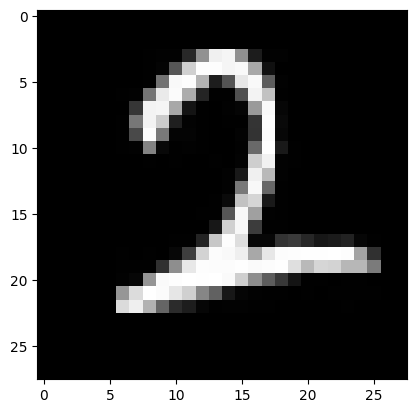

1/1 [==============================] - 1s 725ms/step
Predicted Digit: ('1.jpg', 2)


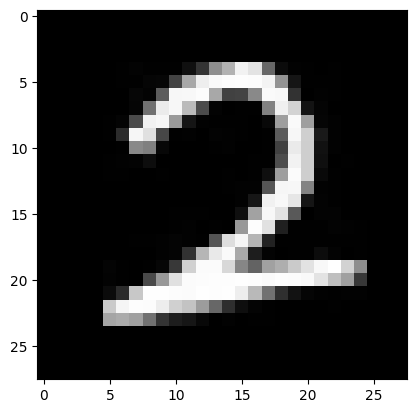

1/1 [==============================] - 0s 59ms/step
Predicted Digit: ('2.jpg', 2)


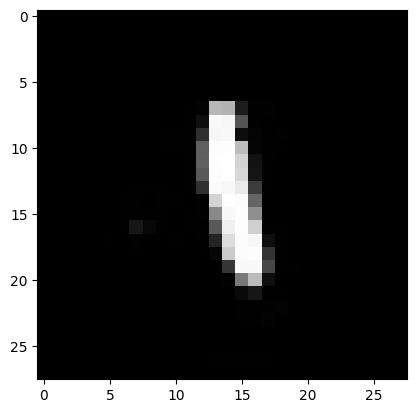

1/1 [==============================] - 0s 53ms/step
Predicted Digit: ('3.jpg', 1)


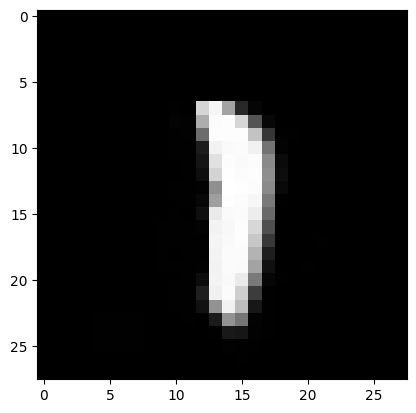

1/1 [==============================] - 0s 54ms/step
Predicted Digit: ('4.jpg', 1)


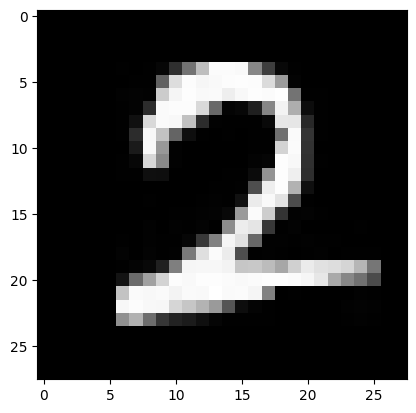

1/1 [==============================] - 0s 49ms/step
Predicted Digit: ('5.jpg', 2)


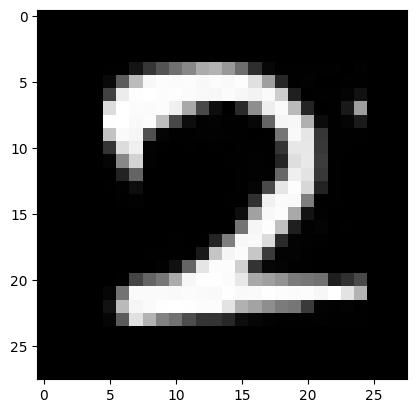

1/1 [==============================] - 0s 48ms/step
Predicted Digit: ('6.jpg', 2)


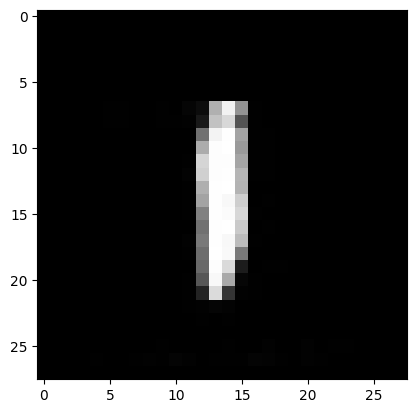

1/1 [==============================] - 0s 52ms/step
Predicted Digit: ('7.jpg', 1)


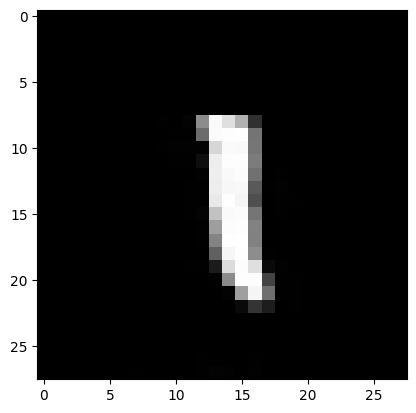

1/1 [==============================] - 0s 50ms/step
Predicted Digit: ('8.jpg', 1)


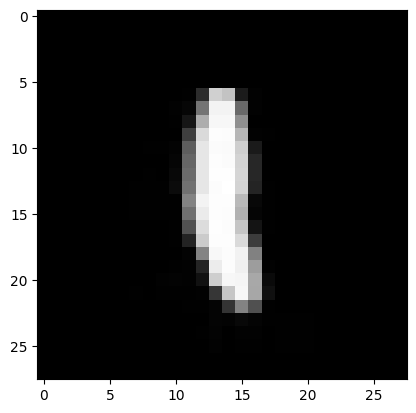

1/1 [==============================] - 0s 57ms/step
Predicted Digit: ('9.jpg', 1)


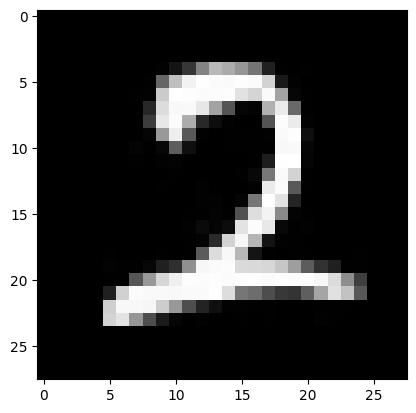

1/1 [==============================] - 0s 55ms/step
Predicted Digit: ('10.jpg', 2)


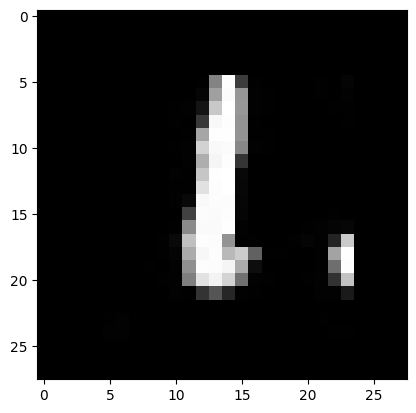

1/1 [==============================] - 0s 51ms/step
Predicted Digit: ('11.jpg', 1)


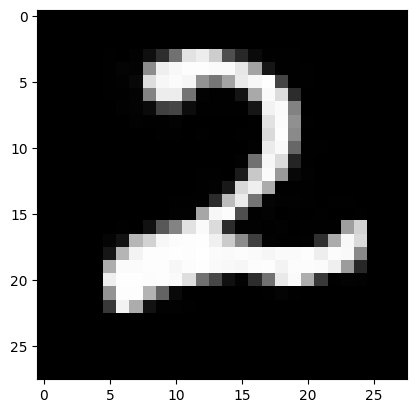

1/1 [==============================] - 0s 57ms/step
Predicted Digit: ('12.jpg', 2)


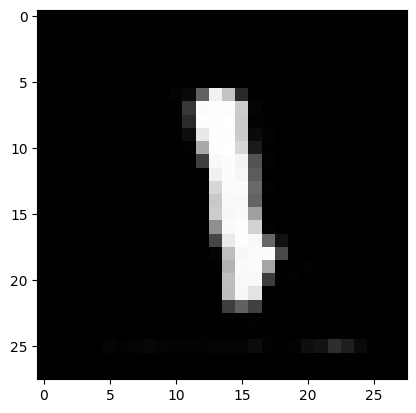

1/1 [==============================] - 0s 47ms/step
Predicted Digit: ('13.jpg', 1)


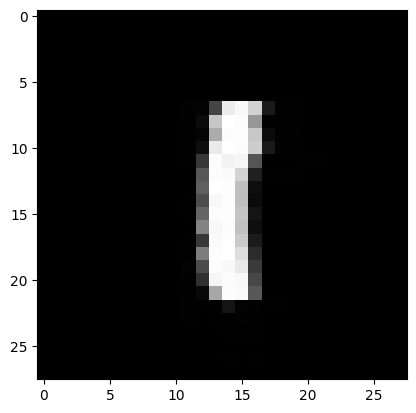

1/1 [==============================] - 0s 48ms/step
Predicted Digit: ('14.jpg', 1)


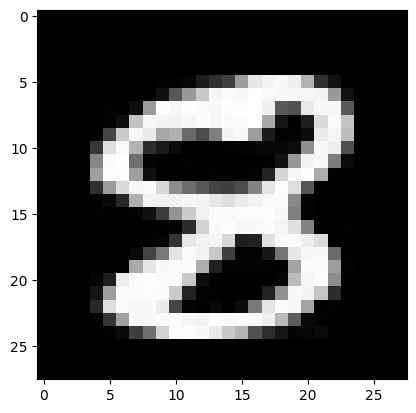

1/1 [==============================] - 0s 48ms/step
Predicted Digit: ('15.jpg', 8)


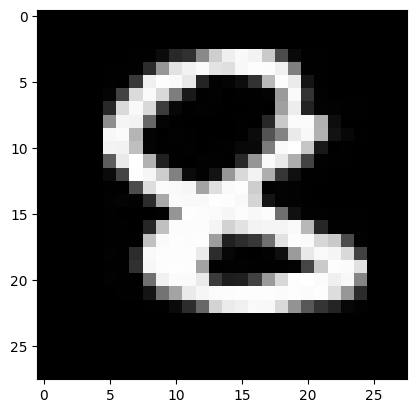

1/1 [==============================] - 0s 47ms/step
Predicted Digit: ('16.jpg', 8)


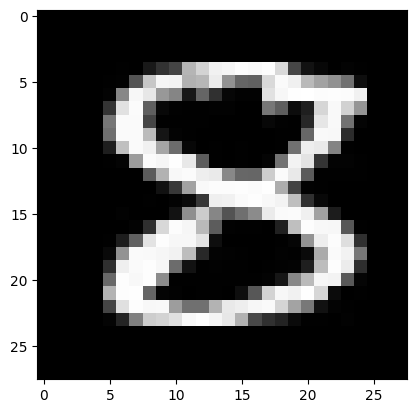

1/1 [==============================] - 0s 47ms/step
Predicted Digit: ('17.jpg', 8)


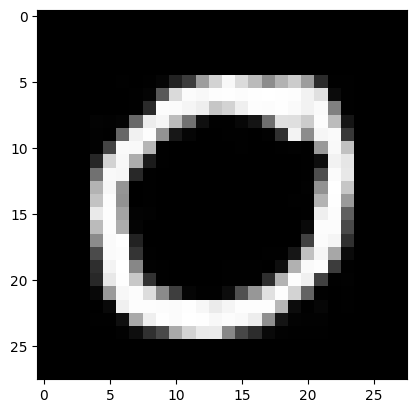

1/1 [==============================] - 0s 49ms/step
Predicted Digit: ('18.jpg', 0)
{1: 2, 2: 2, 3: 1, 4: 1, 5: 2, 6: 2, 7: 1, 8: 1, 9: 1, 10: 2, 11: 1, 12: 2, 13: 1, 14: 1, 15: 8, 16: 8, 17: 8, 18: 0}


[ WARN:0@69.723] global loadsave.cpp:248 findDecoder imread_('images/sheet/k/19.jpg'): can't open/read file: check file path/integrity


In [10]:
updated_dict = {}
image_path = "images/sheet/k/"
try:
    for key, filename in enumerate(lis, start=1):
            if filename.endswith(".jpg"):
                    img_path = os.path.join(image_path, filename)
                    image = cv2.imread(img_path)
                    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    gray = cv2.resize(255-img_gray, (28,28))
                    while np.sum(gray[0]) == 0:
                        gray = gray[1:]
            
                    while np.sum(gray[:,0]) == 0:
                        gray = np.delete(gray,0,1)
            
                    while np.sum(gray[-1]) == 0:
                        gray = gray[:-1]
            
                    while np.sum(gray[:,-1]) == 0:
                        gray = np.delete(gray,-1,1)
            
                    rows,cols = gray.shape
                    if rows > cols:
                        factor = 20.0/rows
                        rows = 20
                        cols = int(round(cols*factor))
                        gray = cv2.resize(gray, (cols,rows))
                    else:
                        factor = 20.0/cols
                        cols = 20
                        rows = int(round(rows*factor))
                        gray = cv2.resize(gray, (cols, rows))
                    colsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
                    rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
                    gray = np.lib.pad(gray,(rowsPadding,colsPadding),'constant')
                    shiftx,shifty = getBestShift(gray)
                    shifted = shift(gray,shiftx,shifty)
                    gray = shifted
                
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    image = cv2.resize(gray, (28, 28))
                    image = image / 255.0
                    plt.imshow(image,cmap='gray')
                    plt.show()
                    input_image = np.reshape(image, (1, 28, 28))
                    predicted_labels = model.predict(input_image)
                    predicted_digit = np.argmax(predicted_labels)
                    print(f"Predicted Digit: {filename ,predicted_digit}")
                    updated_dict[key] = predicted_digit
except:
    pass

print(updated_dict)

In [11]:
for key, value in each_qn.items():
    updated_values = []
    for item in value:
        if item in updated_dict:
            updated_values.append(updated_dict[item])
    each_qn[key] = updated_values
print("box_number and result:", each_qn)

box_number and result: {1: [2], 2: [2], 3: [1], 4: [1], 5: [2], 6: [2], 7: [1], 8: [1], 9: [1], 10: [2], 11: [1, 2], 12: [], 13: [], 14: [1, 1], 15: [8], 16: [], 17: [8], 18: [], 19: [], 20: [8], 21: [], 22: [0]}


In [12]:
for key, value in each_qn.items():
    try:
        each_qn[key] = int("".join(str(digit) for digit in value))
    except:
        each_qn[key] = 0
each_qn

{1: 2,
 2: 2,
 3: 1,
 4: 1,
 5: 2,
 6: 2,
 7: 1,
 8: 1,
 9: 1,
 10: 2,
 11: 12,
 12: 0,
 13: 0,
 14: 11,
 15: 8,
 16: 0,
 17: 8,
 18: 0,
 19: 0,
 20: 8,
 21: 0,
 22: 0}

In [13]:
result = pd.DataFrame.from_dict(each_qn, orient='index', columns=['Score'])

In [14]:
result

,Score
1,2
2,2
3,1
4,1
5,2
6,2
7,1
8,1
9,1
10,2


In [15]:
transposed_df=result.T.reset_index(drop=True)

In [16]:
new_col_name ={
                11: "11A",
                12: "11B",
                13: "12A",
                14: "12B",
                15: "13A",
                16: "13B",
                17: "14A",
                18: "14B",
                19: "15A",
                20: "15B",
                21: "16A",
                22: "16B",
}

In [17]:
transposed_df= transposed_df.rename(columns=new_col_name)

In [ ]:
transposed_df.to_csv("Result.csv")

In [19]:
transposed_df

,1,2,3,4,5,6,7,8,9,10,...,12A,12B,13A,13B,14A,14B,15A,15B,16A,16B
0,2,2,1,1,2,2,1,1,1,2,...,0,11,8,0,8,0,0,8,0,0
